# Trabajo Final (CRP): Estrategia de Retención de Clientes


Base de datos de [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn). 

Procedemos a importar las librerías a utilizar y llamamos la base de datos:

In [79]:
## librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lectura base de datos
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Exploración de la base de datos

A continuación anlálizamos las características de nuestra base de datos buscando describir cómo se relaciona cada columna con la columna objetivo e identificar qué tan relevante puede ser cada características en los posteriores procesos de clusterización y clasificación. 

In [80]:
## Tamaño de la base de datos
print("La base de datos contiene {} registros y {} columnas.".format(data.shape[0], data.shape[1]))

## Primeros 5 regustros
data.head()

La base de datos contiene 7043 registros y 21 columnas.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Las columnas de la base de datos seleccionada contiene atributos del siguiente tipo:

In [81]:
## tipo de objeto de c/característica:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Donde podemos observar que las columnas *SeniorCitizen*, *Tenure* y *MonthlyCharges* son de tipo numérico (int, float), mientras que las demás son de tipo 'object'. El tipo de la columa *TotalCharges* debería ser 'float', sin embargo está siendo leído como 'object'; más adelante en este notebook haremos las correcciones necesarias.

Por otro lado, la tabla anterios nos muestra que no existen valores nulos en ninguna de las columnas de la base de datos, puesto que el conteo de no nulos (non-null) es igual a la cantidad de registros.

La columna *CustomerID* es de tipo alfa-numerica y presenta un valor único para los 7043 registros de la base de datos, además de que no es relevante para el proceso de clasificación, por lo que podemos ignorar esta característica. 

#### Churn distribution

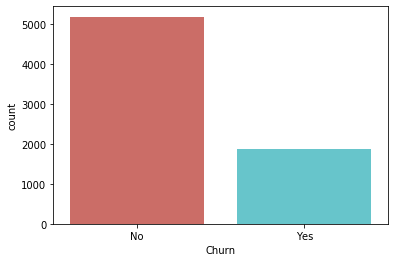

In [82]:
## Distribución de los datos en la columna de salida
sns.countplot(x='Churn', data=data, palette='hls')

In [83]:
## Porcentaje de Usuarios que abandonan y no abandonan el servicio
(data['Churn'].value_counts())/(data.shape[0])*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

De la gráfica anterior tenemos que, de la base de datos utilizada, alrededor de 27% de los Usuarios abandonaron el servicio durante el último mes, mientras que el resto permanecieron. 

#### Gender distribution

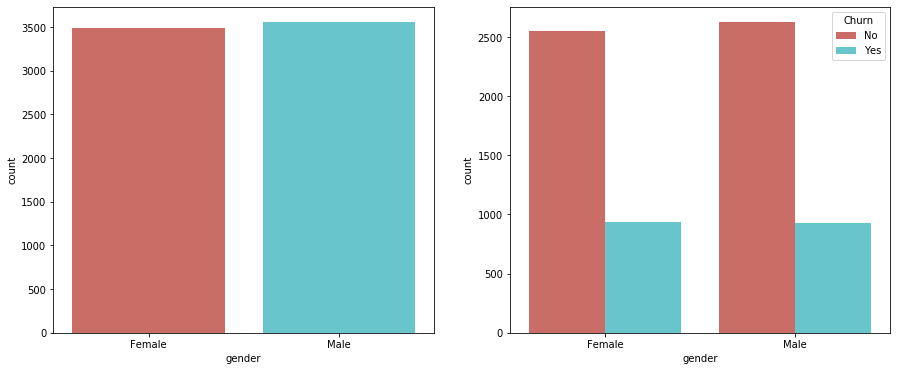

In [84]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna de género
sns.countplot(x='gender', data=data, palette='hls', ax=axes1)

## Distribución de los datos en la columna de género
sns.countplot(x='gender', data=data, hue='Churn', palette='hls', ax=axes2)

La cantidad de Usuarios pertenecientes a cada género es similar en nuestra base de datos.

In [85]:
(data.groupby('Churn')['gender'].value_counts())

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: gender, dtype: int64

Vemos que el género no influye a la hora de predecir tendencias, ya que el porcentaje de Usuarios que permanecen y abandonan el servicio es similar para cada género, por lo que podemos descartar esta columna. 

#### SeniorCitizen Distribution

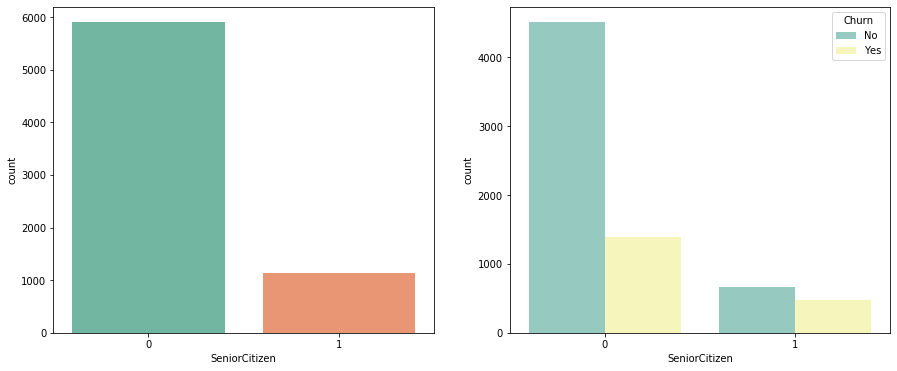

In [86]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna SeniorCitizen
sns.countplot(x='SeniorCitizen', data=data, palette='Set2', ax=axes1)

## Porcentaje de abandono entre Usuarios Senior y NonSenior
sns.countplot(x='SeniorCitizen', hue='Churn', data=data, palette='Set3', ax=axes2)

In [87]:
## Conteo de datos agrupados por el abandono
data.groupby('Churn')['SeniorCitizen'].value_counts()

Churn  SeniorCitizen
No     0                4508
       1                 666
Yes    0                1393
       1                 476
Name: SeniorCitizen, dtype: int64

Más del 80% de los Usuarios presentes en la base de datos son **NoSeniorCitizens**; estre estos, alrededor del 24% abandonaron el servicio durante el último mes. Mientras que un cerca de un 42% de los **SeniorCitizen** cancelaron el servicio (casi el doble de los **NonSenior**). 

#### Partner Distribution

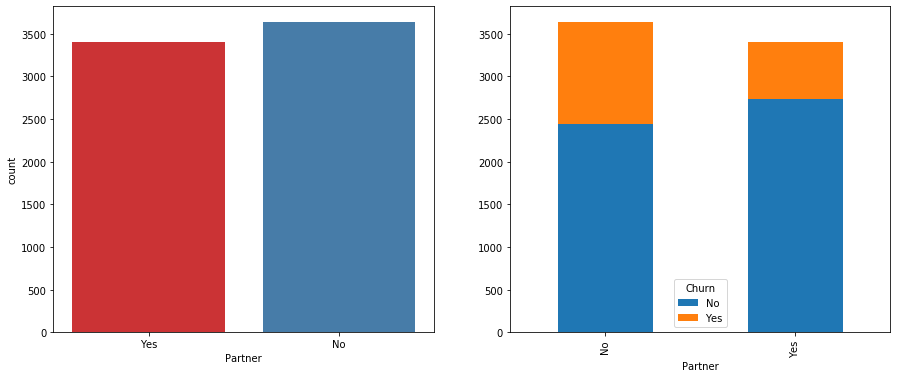

In [88]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Partner
sns.countplot(x='Partner', data=data, palette='Set1', ax=axes1)

## Porcentaje de abandono entre Usuarios con Partnet y los que no tienen
partner_cross = pd.crosstab(data['Partner'], data['Churn'])
partner_cross.plot(kind='bar', stacked=True, ax=axes2)

In [89]:
data.groupby('Churn')['Partner'].value_counts()

Churn  Partner
No     Yes        2733
       No         2441
Yes    No         1200
       Yes         669
Name: Partner, dtype: int64

Entre los Usuarios que aún continúan con el servicio, alrededor de la mitad viven con un compañero. Mientras que casi el doble de los Usuarios que abandonaron el servicio durante el último mes viven solos. 

#### Dependents Distribution

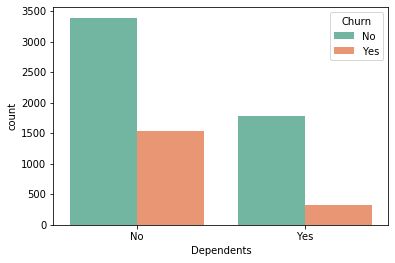

In [90]:
## Distribución de los datos en la columna Dependents
sns.countplot(x='Dependents', hue='Churn', data=data, palette='Set2')

In [91]:
data.groupby('Churn')['Dependents'].value_counts()

Churn  Dependents
No     No            3390
       Yes           1784
Yes    No            1543
       Yes            326
Name: Dependents, dtype: int64

31% de los Usuario que no tienen dependientes abandonaron el servicio durante el último mes, mientras que solo el 15% de los Usuarios que tienen dependientes abandonaron el servicio (50% menos).

#### Contract Distribution

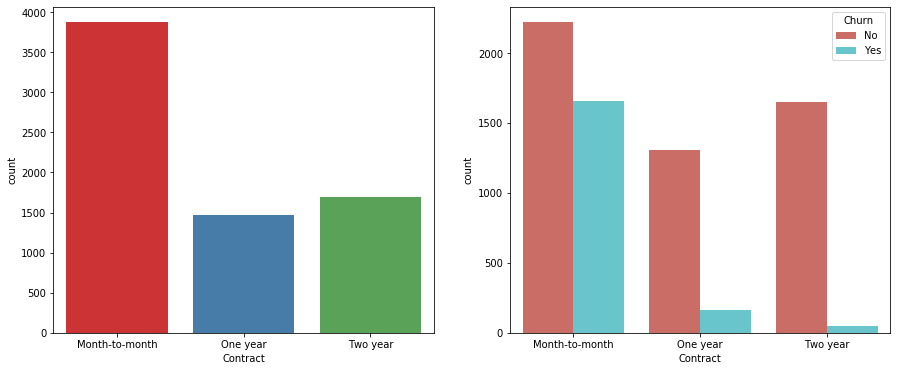

In [92]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
sns.countplot(x='Contract', data=data, palette='Set1', ax=axes1)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
sns.countplot(x='Contract', hue='Churn', data=data, palette='hls', ax=axes2)

In [93]:
data.groupby('Churn')['Contract'].value_counts()

Churn  Contract      
No     Month-to-month    2220
       Two year          1647
       One year          1307
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: Contract, dtype: int64

Más de la mitad (55%) de los Usuarios presentes en la base de datos, contaban con un tipo de contrato "mes a mes". Además, alrededor de un 89% de los Usuarios que abanaron el servicio durante el último mes tenían un tipo de contrato "mes a mes", 9% un contrato a un año y 2% un contrato a dos años.


#### Payment Method Distribution

[Text(0, 0, 'Electronic check'),
 Text(0, 0, 'Mailed check'),
 Text(0, 0, 'Bank transfer (automatic)'),
 Text(0, 0, 'Credit card (automatic)')]

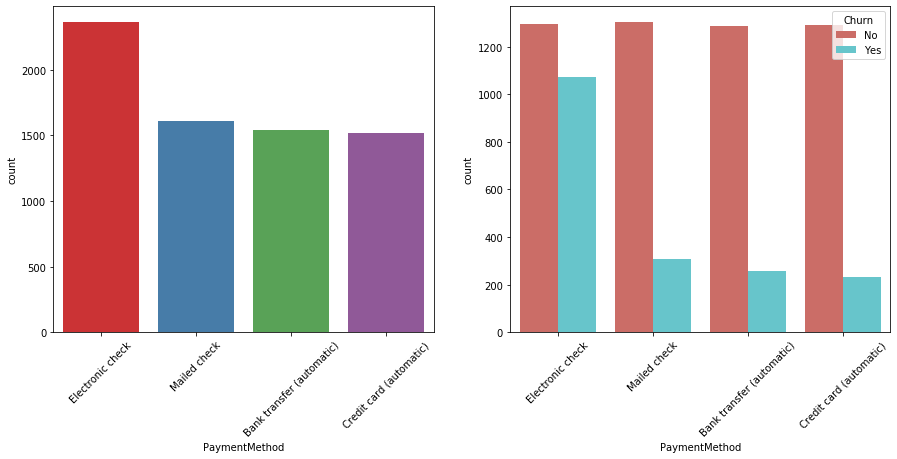

In [94]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Payment Method
chart = sns.countplot(x='PaymentMethod', data=data, palette='Set1', ax=axes1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

## Comportamiento del abandono entre los Usuarios dependiendo del método de pago
chart = sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='hls', ax=axes2)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [95]:
data.groupby('Churn')['PaymentMethod'].value_counts()

Churn  PaymentMethod            
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

La cantidad de Usuarios con método de pago *Electronick Check* es ligeramente mayor que los Usuarios con otros métodos de pago. El abandono entre Usuarios con dicho método fue mucho mayor a los otros. 

#### Tenure distribution

Histograma de la antiguedad de lso Usuarios suscritos al servicio. 

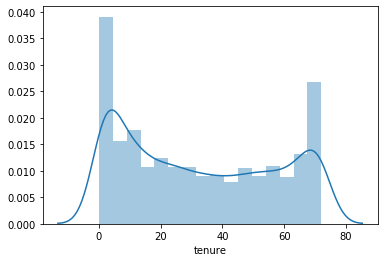

In [96]:
sns.distplot(data.tenure)

Para una mejor visualización, vamos a separar a los Usuarios de acuerdo a la antiguedad en aquellos con menos un año, al menos dos años, tres años, etc. Grafiquemos la antiguedad de los Usuarios y comparemos con el abandono durate el último mes. 

Text(0, 0.5, 'Número Usuarios')

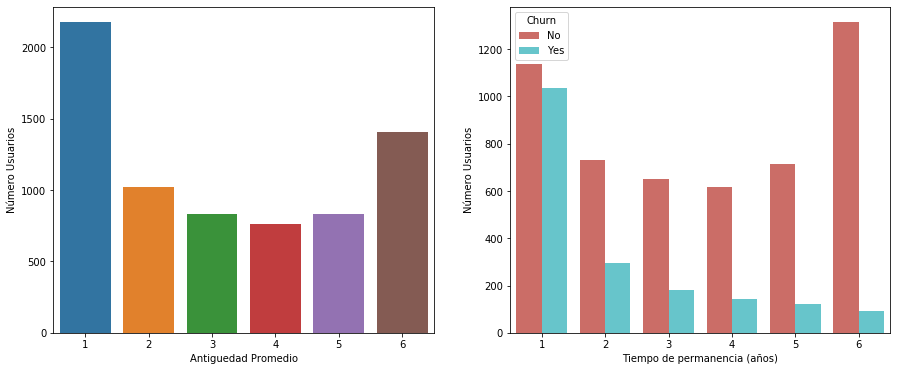

In [97]:
# Agrupamos los datos en la columna Tenure
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1', '2', '3', '4', '5', '6']
data['tenureGroup'] = pd.cut(data["tenure"], bins, labels=labels)

# Antiguedad usuarios
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='tenureGroup', data=data, ax=axes1)
axes1.set_xlabel('Antiguedad Promedio')
axes1.set_ylabel('Número Usuarios')


# Abandono durante el último mes
sns.countplot(x='tenureGroup', hue='Churn', data=data, palette='hls', ax=axes2)
axes2.set_xlabel('Tiempo de permanencia (años)')
axes2.set_ylabel('Número Usuarios')

La mayoría de los Usuarios de la base de datos tienen un año o menos con el servicio, seguidos de los Usuarios con más de 5 años. A medida que aumenta el número de años de suscripción los Usuarios, menor es la tasa de abandono de los mismos.

#### Phone service Distribution

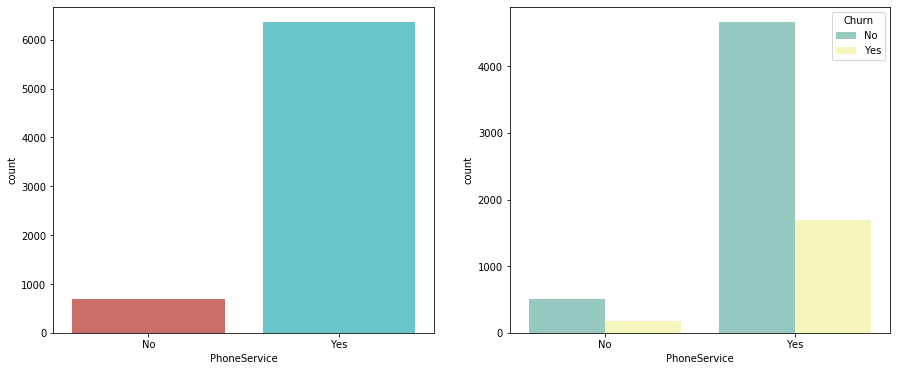

In [98]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
sns.countplot(x='PhoneService', data=data, palette='hls', ax=axes1)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
sns.countplot(x='PhoneService', hue='Churn', data=data, palette='Set3', ax=axes2)

In [99]:
data.groupby('Churn')['PhoneService'].value_counts()

Churn  PhoneService
No     Yes             4662
       No               512
Yes    Yes             1699
       No               170
Name: PhoneService, dtype: int64

Un 90% de los Usuarios contaba con servicio telefónico. El 27% de dichos Usuarios abandonaron durante el último mes. Mientras que de los Usuarios que no contaban con el servicio, un 25% abandonó. Se mantiene la mista tendencia/tasa de abandono en ambos casos.

#### MultipleLines Distribution

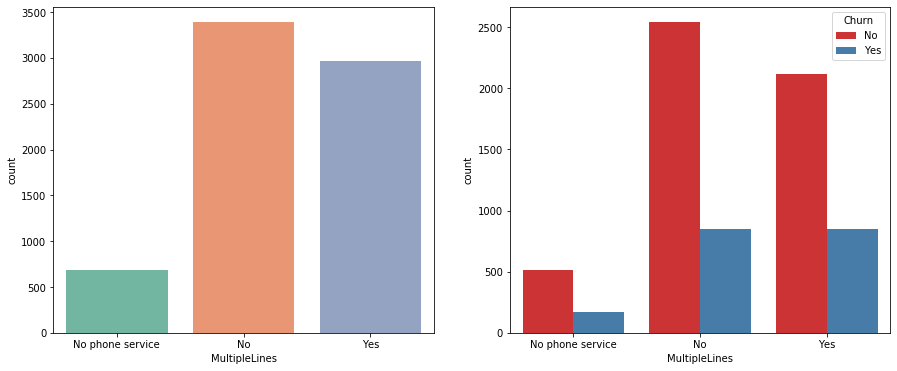

In [100]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
sns.countplot(x='MultipleLines', data=data, palette='Set2', ax=axes1)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
sns.countplot(x='MultipleLines', hue='Churn', data=data, palette='Set1', ax=axes2)

In [101]:
data.groupby('Churn')['MultipleLines'].value_counts()

Churn  MultipleLines   
No     No                  2541
       Yes                 2121
       No phone service     512
Yes    Yes                  850
       No                   849
       No phone service     170
Name: MultipleLines, dtype: int64

Entre los Usuarios que cuentan con servicio telefónico, es ligeramente mayor la cantidad de Usuarios con Múltiples Líneas y la tendencia al abandono en ambos caso es similar (+/- 25% )

#### InternetService Distribution

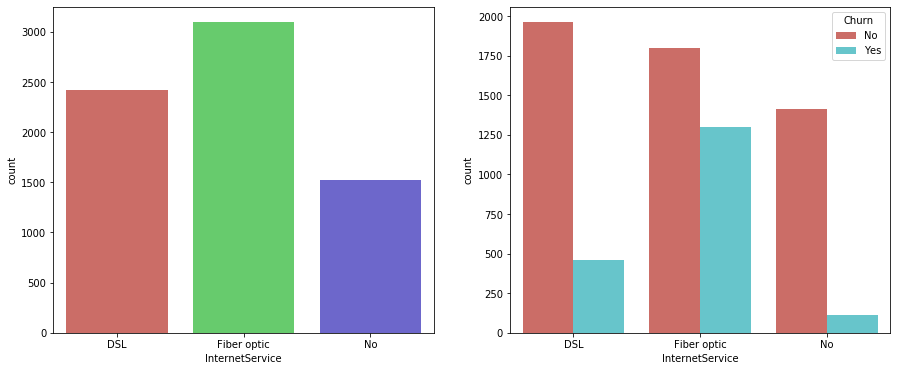

In [102]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
sns.countplot(x='InternetService', data=data, palette='hls', ax=axes1)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
sns.countplot(x='InternetService', hue='Churn', data=data, palette='hls', ax=axes2)

In [103]:
data.groupby('Churn')['InternetService'].value_counts()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: InternetService, dtype: int64

88% de los Usuario de la base de datos contaban con servicio de internet; entre estos, 56% utiliza *fibra óptica* y 44% utiliza *DSL*. La tendencia del abandono es mucho más alta en los usuarios que utilizaban *fibra óptica* con un 42% de los Usuarios de esta categoría (69% del total de los Usuarios que abandonaron el servicio).19% de los Usuarios que utilizaban DSL (25% del total de Usuarios que abandonaron el servicio), abandonó el servicio. Mientras que solo el 7% de los Usuarios que no contaban con servicio de Internet abandonó el servicio (6% del del total de Usuarios que abandonaron el servicio).

#### OnlineSecurity Distribution

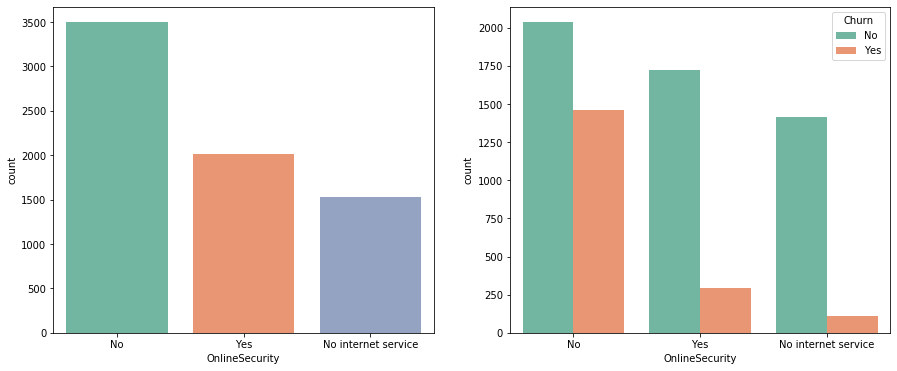

In [104]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
sns.countplot(x='OnlineSecurity', data=data, palette='Set2', ax=axes1)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
sns.countplot(x='OnlineSecurity', hue='Churn', data=data, palette='Set2', ax=axes2)

In [105]:
data.groupby('Churn')['OnlineSecurity'].value_counts()

Churn  OnlineSecurity     
No     No                     2037
       Yes                    1724
       No internet service    1413
Yes    No                     1461
       Yes                     295
       No internet service     113
Name: OnlineSecurity, dtype: int64

42% de los Usuarios que no contaban con servicio de OnlineSecirity abandonaron el servicio (78% del total de Usuarios que abandonaron el servicio). Mientras que solo un 15% de los Usuarios con OnlineSecurity abandonó el servicio (16% de los Usuarios que abandonaron el servicio en el último mes).

#### OnlineBackup distribution

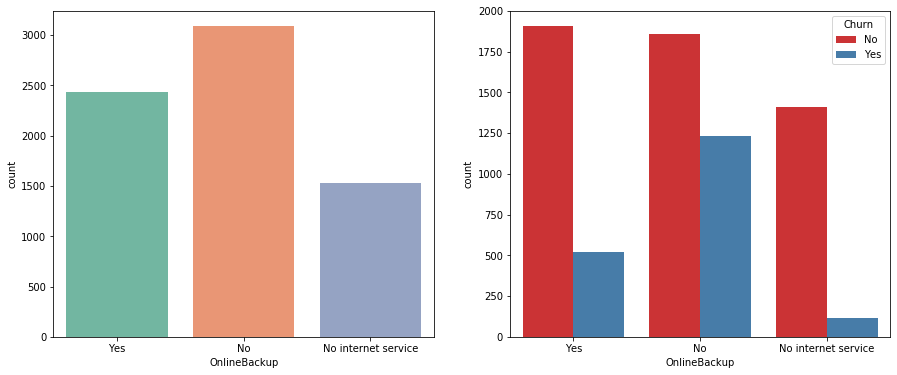

In [106]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribución de los datos en la columna Contract
sns.countplot(x='OnlineBackup', data=data, palette='Set2', ax=axes1)

## Comportamiento del abandono entre los Usuarios dependiendo del tipo de contrato
sns.countplot(x='OnlineBackup', hue='Churn', data=data, palette='Set1', ax=axes2)

In [107]:
data.groupby('Churn')['OnlineBackup'].value_counts()

Churn  OnlineBackup       
No     Yes                    1906
       No                     1855
       No internet service    1413
Yes    No                     1233
       Yes                     523
       No internet service     113
Name: OnlineBackup, dtype: int64

De los Usuarios que abandonaron el servicio, 66% no contaban con *OnlineBackup* (40% de los Usuarios de esta categoría), mientras que el 28% sí contaba con el servicio (22% de los Usuarios de esta categoría). 

#### Monthly Charges Distribution

Ahora creamos una nueva columna (*ChurnBin*) en la cual asignaremos el valor de 0 si el Usuario permanece con el servicio y 1 si el Usuario abandonó el servicio en el último mes. Además, agrupamos la columna de *CargosMensuales* en 10 grupos para una mejor visualización.

Text(0.5, 1.0, 'Tasa de abandono vs Cargos Mensuales')

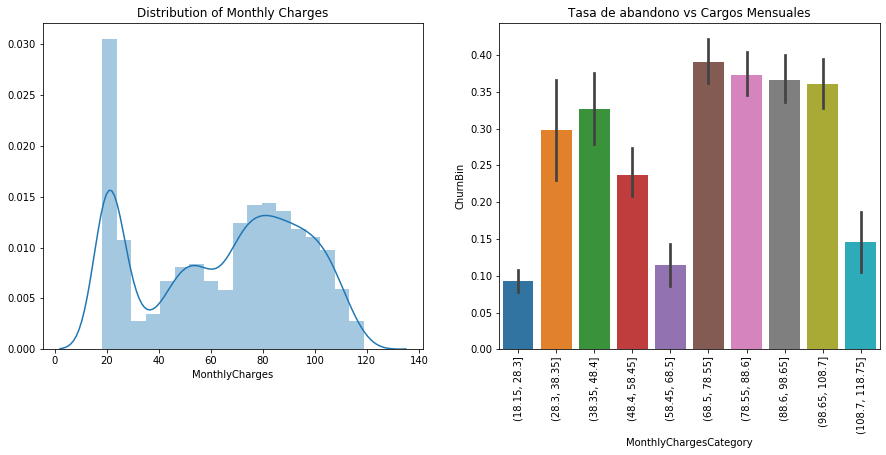

In [108]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Creamos columna ChurnBin
churn_mapping = {"No": 0, "Yes": 1}
data['ChurnBin'] = data['Churn'].map(churn_mapping)

# Histograma cargos mensuales a Usuarios
sns.distplot(data.MonthlyCharges, ax=axes1)
axes1.set_title('Distribution of Monthly Charges')

# Categorizamos la variable entre 10 bins 
data['MonthlyChargesCategory'] = pd.cut(data["MonthlyCharges"], bins=10)
sns.barplot(x='MonthlyChargesCategory', y='ChurnBin', data=data, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Tasa de abandono vs Cargos Mensuales')


In [109]:
data.groupby('Churn')['MonthlyChargesCategory'].value_counts()

Churn  MonthlyChargesCategory
No     (18.15, 28.3]             1458
       (78.55, 88.6]              598
       (88.6, 98.65]              553
       (68.5, 78.55]              544
       (48.4, 58.45]              488
       (98.65, 108.7]             482
       (58.45, 68.5]              420
       (108.7, 118.75]            251
       (38.35, 48.4]              246
       (28.3, 38.35]              134
Yes    (78.55, 88.6]              355
       (68.5, 78.55]              349
       (88.6, 98.65]              320
       (98.65, 108.7]             272
       (48.4, 58.45]              152
       (18.15, 28.3]              148
       (38.35, 48.4]              119
       (28.3, 38.35]               57
       (58.45, 68.5]               54
       (108.7, 118.75]             43
Name: MonthlyChargesCategory, dtype: int64

Un gran número de Usuarios tienen cargos mensuales relativamente bajos (USD 18.15 - 28.3); entre estos la tasa de abandono (9%) es baja en comparación con la tasa de abandono de los Usuarios con cargos mensuales más altos (37% en promedio para Usuarios con cargos mensuales entre USD 78.55 y USD 108.7). La tasa de abandono para los Usuarios con los cargos mensuales más altos (>118.75) fue de solo 15%.

#### Total Charges Distribution

Para esta columna se mencionó que está siendo leída como tipo '*object*', cuando debería ser de tipo flotante. Esto se debe a que existen filas donde los cargos totales se almacenaron como " ". Para lidiar con ello, se llenaron dichas filas asumiendo que los cargos totales resultan del producto entre el *tiempo de permanencia* (**Tenure**) y los *cargos mensuales* (**MonthlyCharges**).

In [110]:
## Reemplazando strings con la fórmula descrita
data['TotalCharges'] = data['TotalCharges'].replace(" ", (data.MonthlyCharges * data.tenure))


## Convertimos la columna a tipo numérico
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

Miremos los tipos de datos de nuestra base nuevamente.

In [111]:
data.dtypes

customerID                  object
gender                      object
SeniorCitizen                int64
Partner                     object
Dependents                  object
tenure                       int64
PhoneService                object
MultipleLines               object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
Contract                    object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
Churn                       object
tenureGroup               category
ChurnBin                     int64
MonthlyChargesCategory    category
dtype: object

Ahora hacemos un histograma y una dsitribución, dividiendo los Cargos Totales en 10 categorías. 

Text(0.5, 1.0, 'Abandono vs Cargos Totales')

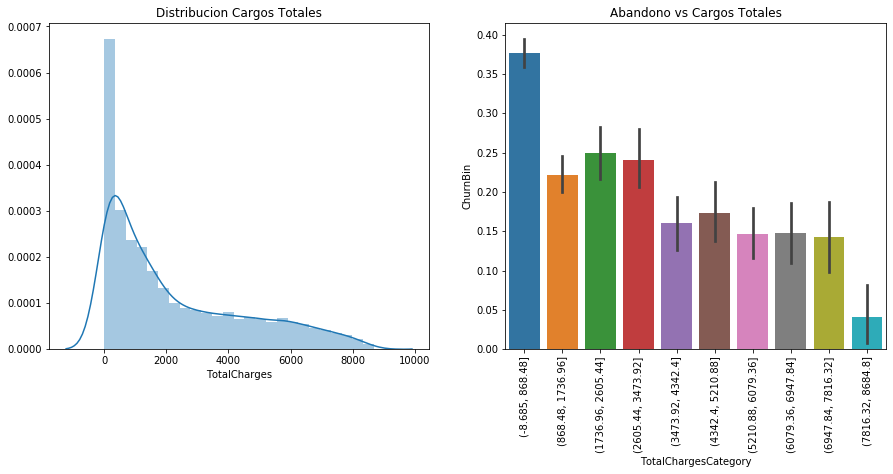

In [112]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Histograma 
sns.distplot(data.TotalCharges, ax=axes1)
axes1.set_title('Distribucion Cargos Totales')

# Distribución Categorizada
data['TotalChargesCategory'] = pd.cut(data["TotalCharges"], bins=10)
sns.barplot(x='TotalChargesCategory', y='ChurnBin', data=data, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Abandono vs Cargos Totales')

De acuerdo con la gráfica, los Usuarios con cargos totales más bajos, presentaron una mayor tasa de abandono durante el último mes. 

#### Correlaciones

Grafiquemos las correlación entre las variables contínuas:

In [113]:
# correlación
data_corr = data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
data_corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


(3, 0)

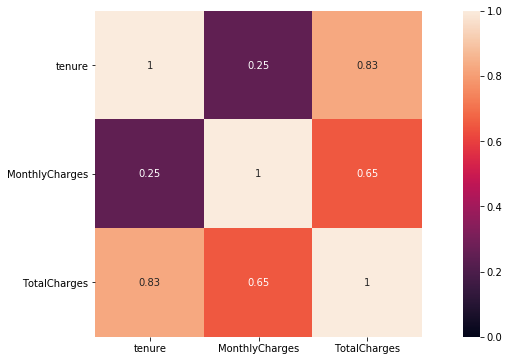

In [114]:
#Mapa de calor

fig, axes = plt.subplots(figsize=(15,6))
sns.heatmap(data=data_corr, annot=True, ax=axes, square=True, linewidths=0, vmin=0, vmax=1)
#[items.set_rotation(90) for items in axes.get_xticklabels()]
[items.set_rotation(0) for items in axes.get_yticklabels()]
axes.set_ylim([3, 0])

Como ya se mencionó, los *Cargos Totales* son resultan del producto entre el *tiempo de permanencia* de los Usuarios y los *cargos mensuales*, por lo que la correlación entre dicha variable con las otras dos arroja valores de 83% y 65%, respectivamente. Para el proceso de clusterización y posterior clasificación de los Usuarios se eliminará esta variable de la base de datos.

### Transformación de la base de datos

Procedemos a eliminar de nuestra base de datos aquellas columnas que se encontraron no ser muy representativas para el proceso de clasificación. 

In [115]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroup,ChurnBin,MonthlyChargesCategory,TotalChargesCategory
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,"(28.3, 38.35]","(-8.685, 868.48]"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,3,0,"(48.4, 58.45]","(1736.96, 2605.44]"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,1,"(48.4, 58.45]","(-8.685, 868.48]"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,4,0,"(38.35, 48.4]","(1736.96, 2605.44]"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,1,"(68.5, 78.55]","(-8.685, 868.48]"


In [116]:
data = data.drop(['customerID', 'gender', 'TotalCharges', 'TotalChargesCategory'], axis=1)

In [117]:
data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'Churn', 'tenureGroup', 'ChurnBin', 'MonthlyChargesCategory'],
      dtype='object')

In [143]:
data.dtypes

SeniorCitizen                int64
Partner                     object
Dependents                  object
tenure                       int64
PhoneService                object
MultipleLines               object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
Contract                    object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
Churn                       object
tenureGroup               category
ChurnBin                     int64
MonthlyChargesCategory    category
dtype: object

Además, convertimos todas las variables tipo 'object' a variables numéricas, ya que los modelos de Machine Learning trabajan mejor con números.

In [144]:
## Tomamos el vector de columnas

cat_columns = data.select_dtypes(['object', 'category']).columns
print(cat_columns)

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'tenureGroup',
       'MonthlyChargesCategory'],
      dtype='object')


In [145]:
## Convertimos variables 'object' a categóricas

data_cat = data.astype({'Partner':'category', 'Dependents':'category', 'PhoneService':'category', 'MultipleLines':'category',
       'InternetService':'category', 'OnlineSecurity':'category', 'OnlineBackup':'category', 'DeviceProtection':'category',
       'TechSupport':'category', 'StreamingTV':'category', 'StreamingMovies':'category', 'Contract':'category',
       'PaperlessBilling':'category', 'PaymentMethod':'category', 'Churn':'category'})

In [146]:
## Miramos el tipo de las variables
data_cat.dtypes

SeniorCitizen                int64
Partner                   category
Dependents                category
tenure                       int64
PhoneService              category
MultipleLines             category
InternetService           category
OnlineSecurity            category
OnlineBackup              category
DeviceProtection          category
TechSupport               category
StreamingTV               category
StreamingMovies           category
Contract                  category
PaperlessBilling          category
PaymentMethod             category
MonthlyCharges             float64
Churn                     category
tenureGroup               category
ChurnBin                     int64
MonthlyChargesCategory    category
dtype: object

In [147]:
data_cat.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,tenureGroup,ChurnBin,MonthlyChargesCategory
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,No,1,0,"(28.3, 38.35]"
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,No,3,0,"(48.4, 58.45]"
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,1,1,"(48.4, 58.45]"
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,No,4,0,"(38.35, 48.4]"
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,1,1,"(68.5, 78.55]"


In [148]:
## Convertimos variables categóricas a numéricas

data_cat[cat_columns]= data_cat[cat_columns].apply(lambda x: x.cat.codes)

In [149]:
## Observamos la base de datos

data_cat.head(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,tenureGroup,ChurnBin,MonthlyChargesCategory
0,0,1,0,1,0,1,0,0,2,0,...,0,0,0,1,2,29.85,0,0,0,1
1,0,0,0,34,1,0,0,2,0,2,...,0,0,1,0,3,56.95,0,2,0,3
2,0,0,0,2,1,0,0,2,2,0,...,0,0,0,1,3,53.85,1,0,1,3
3,0,0,0,45,0,1,0,2,0,2,...,0,0,1,0,0,42.30,0,3,0,2
4,0,0,0,2,1,0,1,0,0,0,...,0,0,0,1,2,70.70,1,0,1,5
5,0,0,0,8,1,2,1,0,0,2,...,2,2,0,1,2,99.65,1,0,1,8
6,0,0,1,22,1,2,1,0,2,0,...,2,0,0,1,1,89.10,0,1,0,7
7,0,0,0,10,0,1,0,2,0,0,...,0,0,0,0,3,29.75,0,0,0,1
8,0,1,0,28,1,2,1,0,0,2,...,2,2,0,1,2,104.80,1,2,1,8
9,0,0,1,62,1,0,0,2,2,0,...,0,0,1,0,0,56.15,0,5,0,3


En la base de datos 'data_cat' se transformaron también las columnas tenureGroup y MonthlyChargesCategory, creadas anteriormente. En este caso, los valores de la columna tenureGroup se les asignó un número  del 0 al 5, de acuerdo al tiempo de permanencia así:

- Menos de un año = 0
- Entre 1 y 2 años = 1
- Entre 2 y 3 años = 2
- Entre 3 y 4 añoss = 3
- Entre 4 y 5 años = 4
- Entre 5 y 6 años = 5

Para los Cargos mensuales, se asignó un número así:

- Entre USD 18.15 - 28.3 = 0
- Entre USD 28.3 - 38.35 = 1
- Entre USD 38.35 - 48.4 = 2
- Entre USD 48.4 - 58.45 = 3
- Entre USD 58.45 - 68.5 = 4
- Entre USD 68.5 - 78.55 = 5
- Entre USD 78.55 - 88.6 = 6
- Entre USD 88.6 - 98.65 = 7
- Entre USD 98.65 - 108.7 = 7
- Entre USD 108.7 - 118.75 = 8

Teniendo en cuenta lo anterios, procedemos a eliminar de nuestra base de datos las columnas '*Tenure*' y '*MonthlyCharges*', además, ya no necesitamos la columna '*ChurnBin*'.

In [150]:
data_cat = data_cat.drop(['tenure', 'MonthlyCharges', 'ChurnBin'], axis=1)
data_cat.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenureGroup,MonthlyChargesCategory
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1
1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,2,3
2,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,3
3,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,3,2
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,5


### Partición Base de Datos y K-Means

A continuación, procedemos a dividir la base de datos en un 80% para el entrenamiento y 20% de prueba. Para el objetivo del notebook, se aplicará el método de K-Means sobre los datos de entrenamiento para agrupar a los Usuarios, luego se analizará el comportamiento de las variables en cada grupo, respecto al abandono. 

Separamos la columna objetuvo '*Churn*' de la base de datos.

In [190]:
data_feat = data_cat.drop(['Churn'], axis=1)
target = data_cat.loc[:, ['Churn']]

Particionamos la base de datos en proporción 80-20

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_feat, target, test_size=0.2, random_state=0)

Buscamos el valor de K:

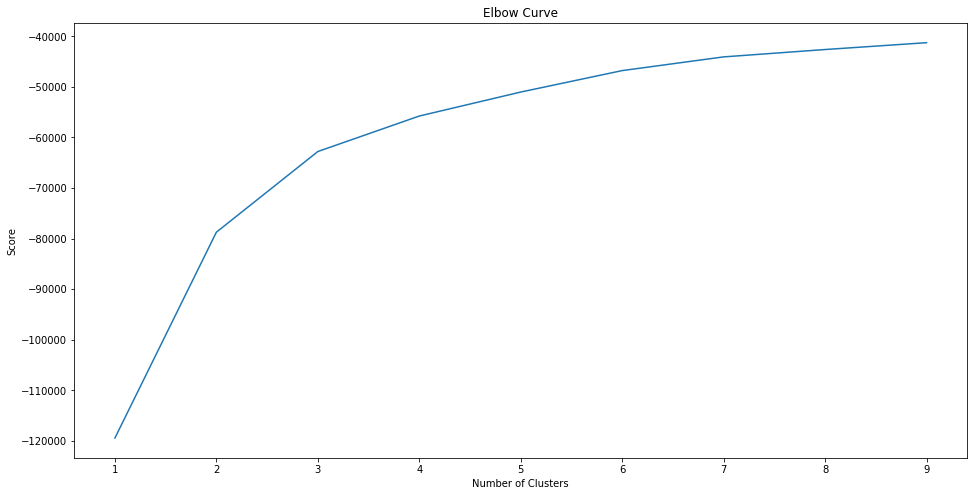

In [192]:
from sklearn.cluster import KMeans

## Buscamos el valor de K

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
score

plt.figure(figsize=(16, 8))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Tomamos K = 4 y aplicamos K-Means sobre la base de datos de de entrenamiento:

In [193]:
# k=4

kmeans = KMeans(n_clusters=4).fit(X_train)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.2377423  0.36145952 0.18985177 0.99486887 0.92303307 0.81470924
  0.40706956 0.55416192 0.58266819 0.40820981 0.85860889 0.8722919
  0.11459521 0.74002281 1.72462942 0.81185861 5.82611174]
 [0.08012487 0.63787721 0.43600416 0.76586889 0.81685744 1.0905307
  1.0842872  1.0301769  0.99063476 0.99063476 0.8491155  0.85744017
  1.44016649 0.40998959 1.23413111 3.93756504 1.34547347]
 [0.21485944 0.6854083  0.33400268 0.97925033 1.55756359 0.70749665
  1.08567604 1.41900937 1.44846051 1.16064257 1.58634538 1.58366801
  1.17871486 0.71285141 1.08835341 4.23761714 7.15863454]
 [0.06877193 0.32       0.3045614  0.80561404 0.38947368 0.97964912
  0.75929825 0.73122807 0.67649123 0.72982456 0.63157895 0.62035088
  0.35859649 0.42175439 2.14807018 0.50877193 1.11929825]]


En este caso tenemos muchas variables, por lo que no es viable realizar una gráfica. Sin embargo, se realizará el análisis de acuerdo con los resultados que se vayan obteniendo:

In [194]:
groups = kmeans.labels_
print(groups.shape)

(5634,)


In [200]:
## Convertimos a pandas

groups = pd.DataFrame(data=groups, columns=['labels'])
print(groups.shape)
groups.head()

(5634, 1)


,labels
0,2
1,3
2,1
3,0
4,2


In [201]:
groups.isna().sum()

labels    0
dtype: int64

In [196]:
## Dataframe conjunto de entrenamiento

data2 = pd.DataFrame(data=X_train, columns=data_feat.columns)
print(data2.shape)
data2.head()

(5634, 17)


,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenureGroup,MonthlyChargesCategory
2920,0,1,0,1,0,0,2,2,2,2,2,2,2,0,3,5,6
2966,1,0,0,0,1,0,0,0,0,0,2,2,0,1,2,1,2
6099,0,1,1,1,2,2,1,1,1,1,1,1,2,0,0,5,0
5482,0,1,1,1,0,0,0,0,2,2,2,2,1,1,3,2,5
2012,0,1,0,1,2,1,2,2,2,0,2,0,0,1,2,3,8


In [214]:
## Agregamos columna con grupos a los datos
data2['labels'] = groups.values
data2['Churn'] = pd.DataFrame(data=y_train, columns=target.columns)

In [215]:
data2.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenureGroup,MonthlyChargesCategory,labels,Churn
2920,0,1,0,1,0,0,2,2,2,2,2,2,2,0,3,5,6,2,0
2966,1,0,0,0,1,0,0,0,0,0,2,2,0,1,2,1,2,3,0
6099,0,1,1,1,2,2,1,1,1,1,1,1,2,0,0,5,0,1,0
5482,0,1,1,1,0,0,0,0,2,2,2,2,1,1,3,2,5,0,1
2012,0,1,0,1,2,1,2,2,2,0,2,0,0,1,2,3,8,2,1


In [216]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2920 to 2732
Data columns (total 19 columns):
SeniorCitizen             5634 non-null int64
Partner                   5634 non-null int8
Dependents                5634 non-null int8
PhoneService              5634 non-null int8
MultipleLines             5634 non-null int8
InternetService           5634 non-null int8
OnlineSecurity            5634 non-null int8
OnlineBackup              5634 non-null int8
DeviceProtection          5634 non-null int8
TechSupport               5634 non-null int8
StreamingTV               5634 non-null int8
StreamingMovies           5634 non-null int8
Contract                  5634 non-null int8
PaperlessBilling          5634 non-null int8
PaymentMethod             5634 non-null int8
tenureGroup               5634 non-null int8
MonthlyChargesCategory    5634 non-null int8
labels                    5634 non-null int32
Churn                     5634 non-null int8
dtypes: int32(1), int64(1), int8(

In [209]:
data2['labels'].value_counts()

0    1754
2    1494
3    1425
1     961
Name: labels, dtype: int64

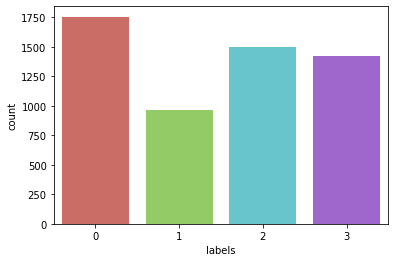

In [210]:
## Distribución de los datos en la columna de salida
sns.countplot(x='labels', data=data2, palette='hls')

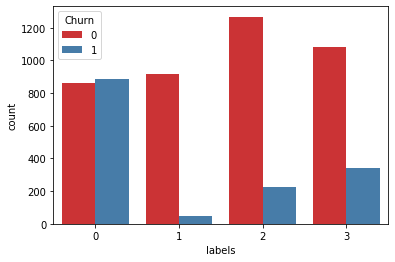

In [218]:
## Comportamiento del abandono entre los Usuarios dependiendo del grupo
sns.countplot(x='labels', hue='Churn', data=data2, palette='Set1')

In [220]:
## Comportamiento del abandono entre los Usuarios dependiendo del grupo
data2.groupby('Churn')['labels'].value_counts()

Churn  labels
0      2         1268
       3         1084
       1          916
       0          865
1      0          889
       3          341
       2          226
       1           45
Name: labels, dtype: int64